# ** EDA 1 - Title: Bike Details Dataset**

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
db = pd.read_csv("BIKE DETAILS.csv")
db

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
# **Q 1** What is the range of selling prices in the dataset?

price_column = 'selling_price'
price_range = db[price_column].max() - db[price_column].min()

print(f"The range of selling prices is: {price_range}")

The range of selling prices is: 755000


In [ ]:
# Q2 What is the median selling price for bikes in the dataset ?

median_price= db[price_column].median()
print(f"Median selling price:", median_price)

Median selling price: 45000.0


In [ ]:
# **Q3.**What is the most common seller type ?

most_common_seller = db["seller_type"].mode()[0]
print("Most common seller type:", most_common_seller)

Most common seller type: Individual


In [ ]:
# **Q4.**How many bikes have driven more than 50,000 kilometers?

count = db[db["km_driven"] > 50000].shape[0]
print(f"Number of bikes driven more than 50,000 km: {count}")

Number of bikes driven more than 50,000 km: 170


In [ ]:
# Q.5 What is the average km_driven value for each ownership type

average_km_driven = db.groupby("owner")["km_driven"].mean()
print(average_km_driven)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#  Q6. What proportion of bikes are from the year 2015 or older


proportion = (db['year'] <= 2015).sum() / len(db)
print(f"Proportion of bikes from 2015 or older: {proportion:.2f}")


Proportion of bikes from 2015 or older: 0.57


In [ ]:
# Q7. What is the trend of missing values across the dataset?

missing_values = db.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
# Q8. What is the highest ex_showroom_price recorded, and for which bike?

highest_price_bike = db.loc[db['ex_showroom_price'].idxmax()]
highest_price = highest_price_bike['ex_showroom_price']
bike_name = highest_price_bike['name']

print(f"The highest ex_showroom_price recorded is {highest_price} for the bike {bike_name}.")

The highest ex_showroom_price recorded is 1278000.0 for the bike Harley-Davidson Street Bob.


In [ ]:
# Q9. What is the total number of bikes listed by each seller type ?

bike_count = db.groupby('seller_type')['name'].count()
print(bike_count)

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64


In [ ]:
# Q10.  What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_bikes = db[db['owner'] == 'First Owner']

correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"The correlation between selling_price and km_driven for first-owner bikes is: {correlation}")


The correlation between selling_price and km_driven for first-owner bikes is: nan


In [ ]:
# Q 11. Identify and remove outliers in the km_driven column using the IQR method ?

Q1 = db['km_driven'].quantile(0.25)
Q3 = db['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = db[(db['km_driven'] < lower_bound) | (db['km_driven'] > upper_bound)]
db = db.drop(outliers.index)
print(db)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner

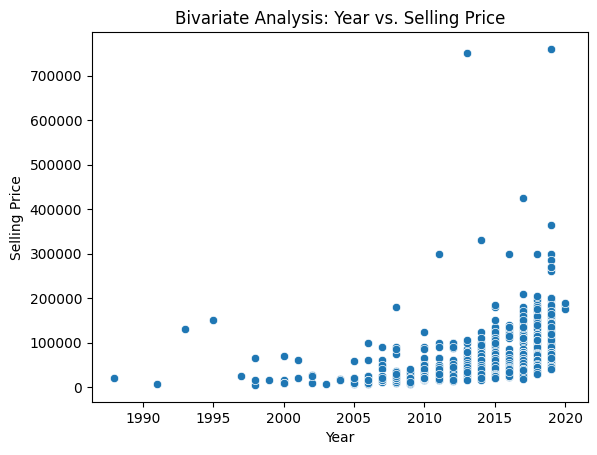

In [ ]:
# Q 12. Perform a bivariate analysis to visualize the relationship between year and selling_price ?

sns.scatterplot(x='year', y='selling_price', data=db)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Bivariate Analysis: Year vs. Selling Price')
plt.show()


In [ ]:
# Q13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?

current_year = 2025
db['age'] = current_year - db['year']
db['depreciation'] = db['selling_price'] - db['ex_showroom_price']
average_depreciation = db.groupby('age')['depreciation'].mean()
print(average_depreciation)

age
5     34260.000000
6     -2954.562500
7    -13023.194805
8    -22307.226190
9    -28750.407407
10   -28314.291139
11   -34287.812500
12   -42766.423077
13   -37556.709677
14   -48027.354839
15   -46757.280000
16   -41398.909091
17   -53021.166667
18   -42399.000000
19   -39664.500000
20   -44852.000000
21   -36852.000000
22             NaN
23             NaN
24   -34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [ ]:
# Q14. Which bike names are priced significantly above the average price for their manufacturing year?

average_price_by_year = db.groupby('year')['selling_price'].mean()
db['average_price_year'] = db['year'].map(average_price_by_year)
db['price_difference'] = db['selling_price'] - db['average_price_year']
significant_prices = db[db['price_difference'] > 2 * db['price_difference'].std()]
print(significant_prices)


                                     name  selling_price  year seller_type  \
7    Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
13                          Yamaha YZF R3         365000  2019  Individual   
130      Royal Enfield Continental GT 650         299000  2019  Individual   
134            Harley-Davidson Street Bob         750000  2013  Individual   
146                            KTM RC 390         180000  2017  Individual   
242                            KTM RC 390         210000  2017  Individual   
261         Royal Enfield Interceptor 650         260000  2019  Individual   
288                            KTM RC 390         270000  2019  Individual   
289        Kawasaki Ninja 650 [2018-2019]         425000  2017  Individual   
295                       Suzuki GSX S750         760000  2019  Individual   
311            Harley-Davidson Street 750         330000  2014  Individual   
315         Royal Enfield Interceptor 650         285000  2019  

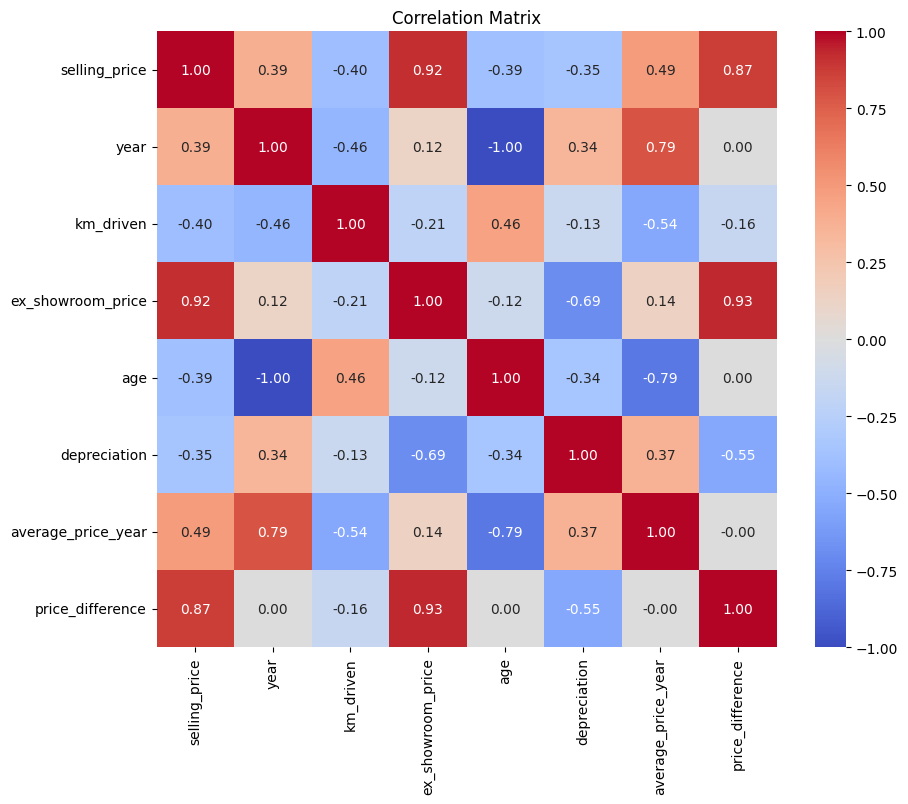

In [ ]:
# Q15 Develop a correlation matrix for numeric columns and visualize it using a heatmap?

numeric_columns = db.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# ** EDA - 2 - Title: Car Sale Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Car Sale.csv")
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
# Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

average_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()
print(average_price_by_dealer)

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

In [ ]:
# Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_variation_by_brand = df.groupby('Company')['Price ($)'].std()
highest_variation_brand = price_variation_by_brand.idxmax()
print(f"The car brand with the highest variation in prices is {highest_variation_brand}.")

The car brand with the highest variation in prices is Lincoln.


Interquartile Ranges of Car Prices by Transmission Type:
                 0.25     0.75      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


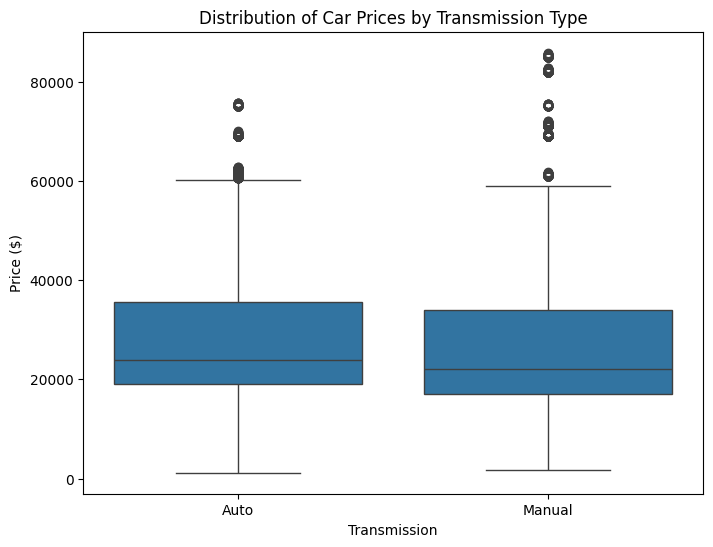

In [ ]:
# Q3.  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.xlabel('Transmission')
plt.ylabel('Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.show

iqr_values = df.groupby("Transmission")["Price ($)"].quantile([0.25, 0.75]).unstack()
iqr_values["IQR"] = iqr_values[0.75] - iqr_values[0.25]

print("Interquartile Ranges of Car Prices by Transmission Type:")
print(iqr_values)


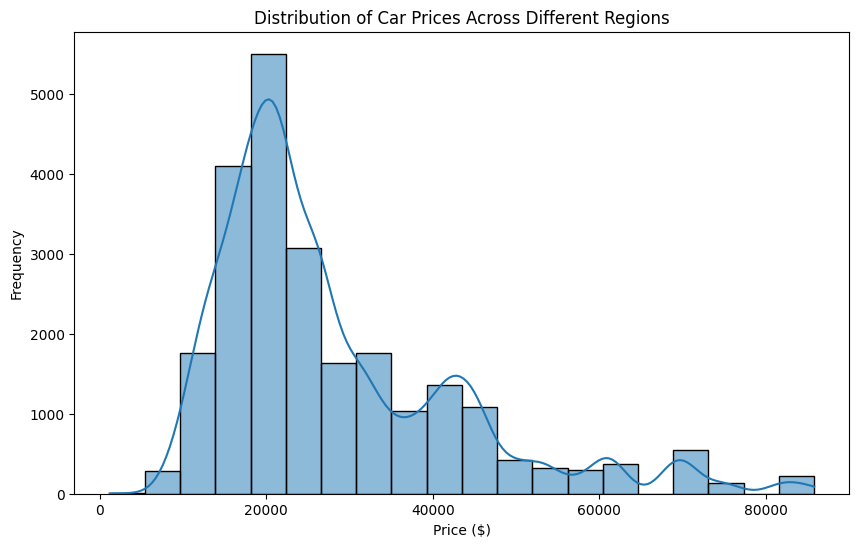

In [ ]:
# Q4.What is the distribution of car prices across different regions?


plt.figure(figsize=(10, 6))
sns.histplot(df['Price ($)'], bins=20, kde=True)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices Across Different Regions')
plt.show()



In [ ]:
# Q5.  What is the distribution of cars based on body styles ?

body_style_counts = df['Body Style'].value_counts()
print(body_style_counts)

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [ ]:
# Q6. How does the average selling price of cars vary by customer gender and annual income ?

average_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
print(average_price_by_gender_income)

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


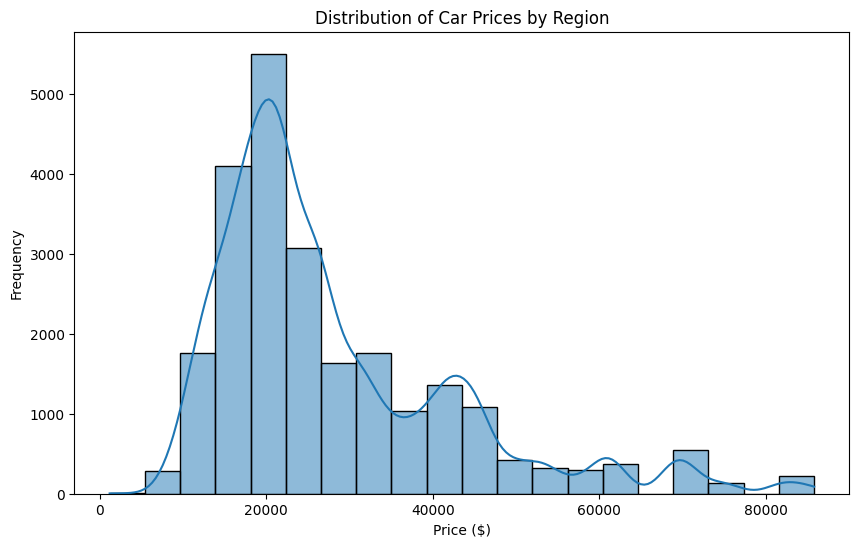

In [ ]:
# Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

plt.figure(figsize=(10, 6))
sns.histplot(df['Price ($)'], bins=20, kde=True)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices by Region')
plt.show()

In [ ]:
# Q8 How does the average car price differ between cars with different engine sizes ?

average_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean()
print(average_price_by_engine_size)


Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [ ]:
# Q9. How do car prices vary based on the customer’s annual income bracket ?

price_by_income_bracket = df.groupby('Annual Income')['Price ($)'].mean()
print(price_by_income_bracket)

Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


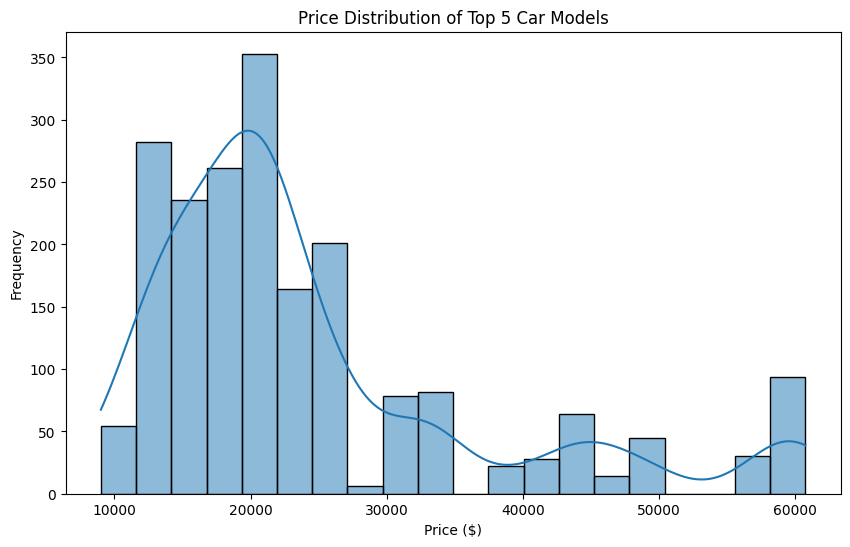

In [ ]:
# Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look ?

top_5_models = df.groupby('Model')['Price ($)'].count().nlargest(5)
top_5_models_prices = df[df['Model'].isin(top_5_models.index)]

plt.figure(figsize=(10, 6))
sns.histplot(top_5_models_prices['Price ($)'], bins=20, kde=True)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Price Distribution of Top 5 Car Models')
plt.show()

In [ ]:
# Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation ?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Car Sale.csv")
price_variation_by_color =df.groupby('Color')['Price ($)'].std()
highest_variation_color = price_variation_by_color.idxmax()
print(f"The color with the highest price variation is {highest_variation_color}.")


The color with the highest price variation is Red.


In [ ]:
# Q12. Is there any seasonal trend in car sales based on the date of sale ?

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sales_by_month = df.groupby('Month').size()
print(sales_by_month)


Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
dtype: int64


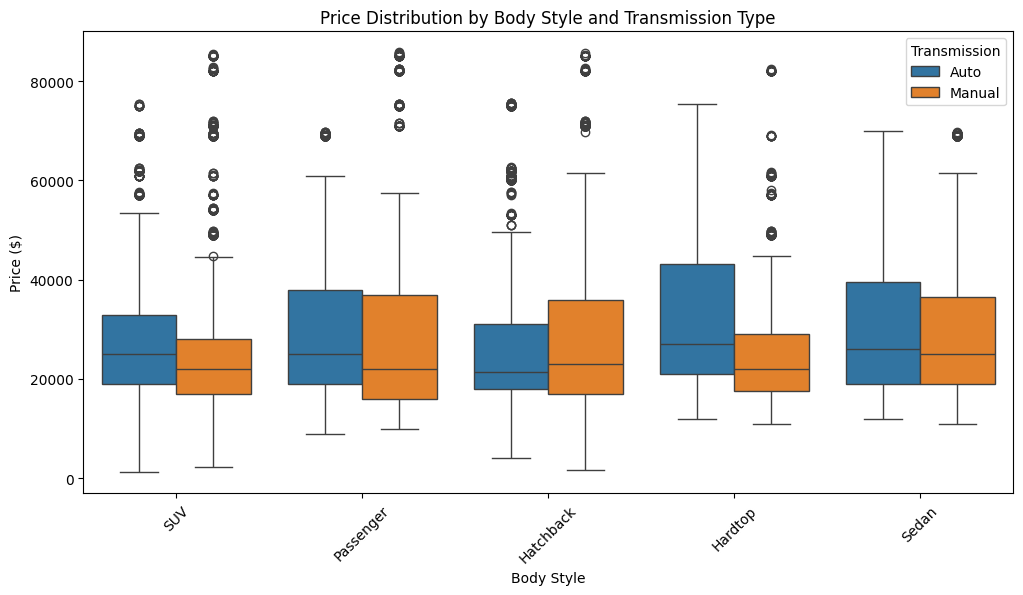

In [ ]:
# Q13. How does the car price distribution change when considering different combinations of body style and transmission type ?

plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact ?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Car Sale.csv")
# Assuming 'Engine' column has string values, extract numeric part
df['Engine_Numeric'] = pd.to_numeric(df['Engine'], errors='coerce')
correlation_matrix = df[['Price ($)', 'Engine_Numeric', 'Annual Income']].corr()
print(correlation_matrix)


                Price ($)  Engine_Numeric  Annual Income
Price ($)        1.000000             NaN       0.012065
Engine_Numeric        NaN             NaN            NaN
Annual Income    0.012065             NaN       1.000000


In [ ]:
# Q15. How does the average car price vary across different car models and engine types?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Car Sale.csv')

average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print(average_price_by_model_engine)


Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


# ** EDA - 3 - Title: Amazon Sales Data **

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
ds = pd.read_csv('amazon.csv')
ds

,product_id,product_name,category,discounted_price(₹),actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,"₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but t

In [ ]:
# Q1.  What is the average rating for each product category?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
ds['rating'] = pd.to_numeric(ds['rating'], errors='coerce')

average_rating_by_category = ds.groupby('category')['rating'].mean()
print(average_rating_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [ ]:
# Q2.What are the top rating_count products by category ?

top_rating_count_products = ds.groupby('category')['rating_count'].idxmax()
print(top_rating_count_products)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    1157
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                    695
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                            906
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                         772
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                            844
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         616
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

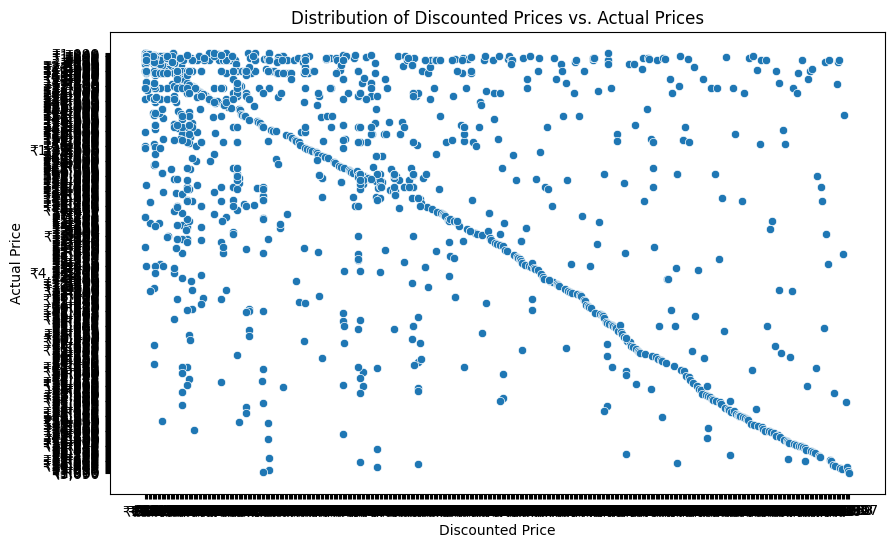

In [ ]:
# Q3. What is the distribution of discounted prices vs. actual prices ?

plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='actual_price', data=ds)
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.show()


In [ ]:
# Q4. How does the average discount percentage vary across categories?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
ds = pd.read_csv('amazon.csv')
ds['discount_percentage'] = ds['discount_percentage'].astype(str).str.rstrip('%').astype(float)

average_discount_by_category = ds.groupby('category')['discount_percentage'].mean()
print(average_discount_by_category)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    0.420
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   0.785
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           0.350
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        0.565
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           0.465
                                                                                                                          ...  
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        0.000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|L

In [ ]:
# Q5. What are the most popular product names ?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
ds = pd.read_csv('amazon.csv')
popular_products = ds['product_name'].value_counts().head(3)
print(popular_products)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution    5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating             4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                              3
Name: count, dtype: int64


In [ ]:
# Q6. What are the most popular product keywords ?

popular_keywords = ds['product_id'].value_counts().head(10)
print(popular_keywords)


product_id
B083342NKJ    3
B077Z65HSD    3
B09W5XR9RT    3
B09KLVMZ3B    3
B09NHVCHS9    3
B098NS6PVG    3
B09C6HXFC1    3
B085DTN6R2    3
B08HDJ86NZ    3
B096MSW6CT    3
Name: count, dtype: int64


In [ ]:
# Q7. What are the most popular product reviews?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
ds = pd.read_csv('amazon.csv')
popular_reviews = ds['review_title'].value_counts().head(3)
print(popular_reviews)


review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                        10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                        8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good     8
Name: count, dtype: int64


In [ ]:
# Q8. What is the correlation between discounted_price and rating?
# Q8. What is the correlation between discounted_price and rating?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
ds = pd.read_csv('amazon.csv')

ds['discounted_price(₹)'] = pd.to_numeric(ds['discounted_price(₹)'], errors='coerce')
ds['rating'] = pd.to_numeric(ds['rating'], errors='coerce')

correlation_discounted_price_rating = ds['discounted_price(₹)'].corr(ds['rating'])
print(correlation_discounted_price_rating)

0.12033741712288548


In [ ]:
# Q9.What are the Top 5 categories based on the highest ratings?
ds['rating'] = pd.to_numeric(ds['rating'], errors='coerce')

top_5_categories = ds.groupby('category')['rating'].mean().nlargest(5)
print(top_5_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


Q10. Identify any potential areas for improvement or optimization based on the data analysis.
Ans.Sales Performance Optimization – Identifying underperforming products and analyzing patterns in bestsellers to refine inventory and marketing strategies.

Pricing Strategy – Evaluating price elasticity and competitor benchmarking to adjust pricing dynamically.

Customer Experience & Satisfaction – Reviewing customer feedback and return trends to address pain points and enhance service quality.

Inventory & Supply Chain Efficiency – Pinpointing stockouts, optimizing fulfillment processes, and reducing operational costs.

Advertising & Conversion Rates – Assessing ad performance, CTRs, and keyword effectiveness to refine ad campaigns for better ROI.

Market Expansion Opportunities – Analyzing trends in geography-based sales data to identify new market entry points or expansion strategies.

# EDA - 4 Spotify Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
dd = pd.read_csv("spotify.csv")
dd

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [2]:
#Q1  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?

dd.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


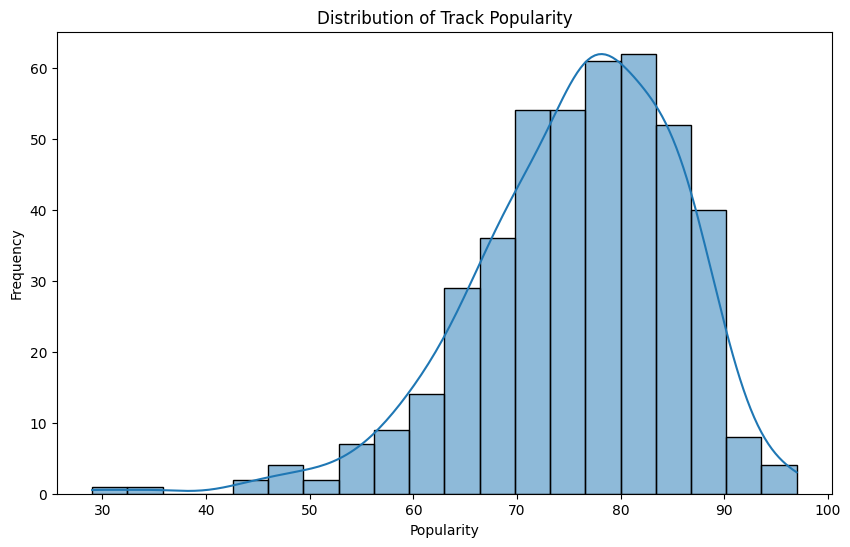

In [4]:
#Q2  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

plt.figure(figsize=(10, 6))
# Access the column using the correct name 'Popularity'
sns.histplot(dd['Popularity'], bins=20, kde=True)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

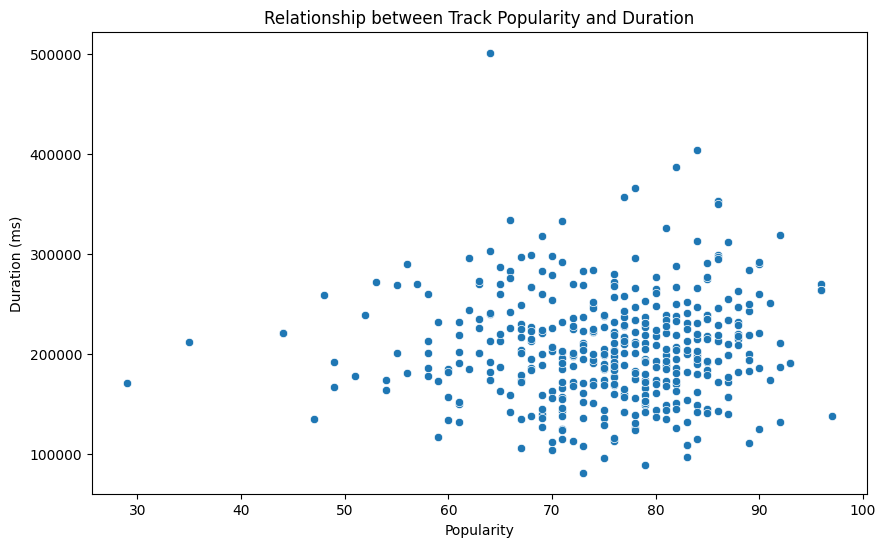

In [6]:
# Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Duration (ms)', data=dd)
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.title('Relationship between Track Popularity and Duration')
plt



In [7]:
# Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

artist_track_counts = dd['Artist'].value_counts()
highest_artist = artist_track_counts.idxmax()
print(f"The artist with the highest number of tracks is {highest_artist}.")


The artist with the highest number of tracks is Drake.


In [8]:
# Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

least_popular_tracks = dd.nsmallest(5, 'Popularity')
print(least_popular_tracks)


             Artist                     Track Name  Popularity  Duration (ms)  \
207          Pressa  Attachments (feat. Coi Leray)          29         171000   
231   Justin Bieber                     Intentions          35         212853   
413  French Montana                Splash Brothers          44         221863   
435  French Montana                Splash Brothers          44         221863   
225        Lil Baby                  On Me - Remix          47         135444   

                   Track ID  
207  6EfJ8Ct3GHbBz2YlyPnMYb  
231  7jAVt70Xdg8EwOtsFB1ZqK  
413  3fBsEOnzwtlkpS0LxXAZhN  
435  3fBsEOnzwtlkpS0LxXAZhN  
225  2uUFVnVFERNxUdcmvEs7LB  


In [9]:
# Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

top_5_artists = dd['Artist'].value_counts().nlargest(5)
average_popularity_by_artist = dd[dd['Artist'].isin(top_5_artists.index)].groupby('Artist')['Popularity'].mean()
highest_avg_popularity_artist = average_popularity_by_artist.idxmax()
print(f"The artist with the highest average popularity among the top 5 most popular artists is {highest_avg_popularity_artist}.")


The artist with the highest average popularity among the top 5 most popular artists is Travis Scott.


In [11]:
# Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

top_5_artists = dd['Artist'].value_counts().nlargest(5)
most_popular_tracks_by_artist = dd[dd['Artist'].isin(top_5_artists.index)].groupby('Artist')['Track Name'].first()
print(most_popular_tracks_by_artist)


Artist
21 Savage                                       née-nah
Drake           Rich Baby Daddy (feat. Sexyy Red & SZA)
Eminem                                       Without Me
Lil Nas X             INDUSTRY BABY (feat. Jack Harlow)
Travis Scott                     MELTDOWN (feat. Drake)
Name: Track Name, dtype: object


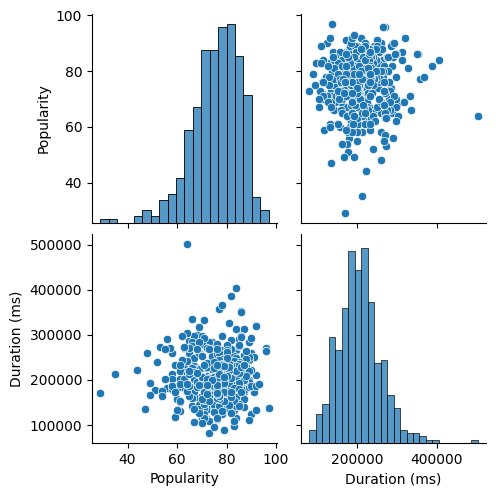

In [12]:
# Q8.  Visualize relationships between multiple numerical variables simultaneously using a pair plot

numerical_columns = dd.select_dtypes(include=['number'])
sns.pairplot(numerical_columns)
plt.show()

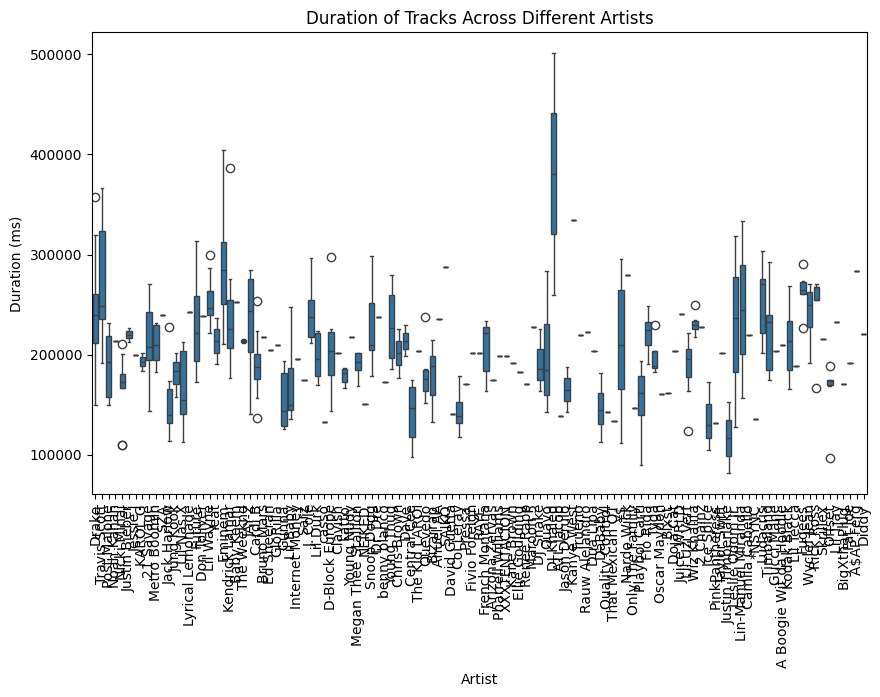

In [13]:
# Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=dd)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.title('Duration of Tracks Across Different Artists')
plt.show()


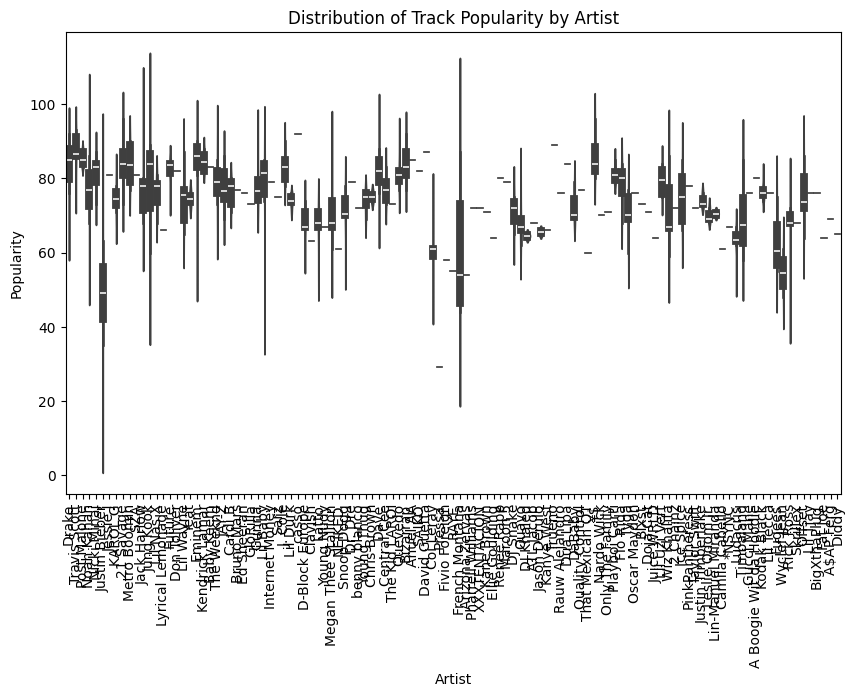

In [14]:
# Q 10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Popularity', data=dd)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity by Artist')
plt.show()